In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import re
import pathlib

import numpy as np
import math
from functools import partial, reduce

from procan_connectome import config  # T0_DATA_PATH, T12_DATA_PATH, DATA_PATH
from procan_connectome.data_ingestion.ingest_data import get_dataset

In [28]:
import pickle

with open("../data/logs/rf_cross_sectional_gsTrue_ssTrue_rfecvTrue_balancedTrue_seed42.pkl", "rb") as handle:
    wrapper = pickle.load(handle)

In [29]:
wrapper.importances_.sum()

Importance      1.0
Importance_2    1.0
dtype: float64

In [25]:
df = pd.DataFrame({"a": [2,2,np.NaN], "b": ["5",np.NaN, np.NaN]}, dtype=np.float32)
df.fillna(0).mean()

# df.sum() / df.count()

a    1.333333
b    1.666667
dtype: float32

In [7]:
df= pd.read_csv("../data/logs/2023_04_27_14_05_rf_longitudinal_feature_importances.csv")
df.sum()

Feature       Age_0Age_1fun_Assortativity_0fun_Assortativity...
Importance                                             1.155946
dtype: object

In [2]:
df = get_dataset(dataset_type="cross_sectional", drop_na=True, global_only=True)
df.head()

fun_Sync    fun_HM  fun_Assortativity  fun_Hierarchy  \
Subject Site Time                                                          
1       2    0    -52.818797  0.037389           7.278813       6.504268   
        1    1    -60.250523  0.064900          22.724355      -5.584579   
2       2    0    -64.738376  0.072894          18.750108       3.284036   
3       2    0    -47.674003  0.054797          15.904290       1.615296   
        1    1    -87.889658  0.156290           7.027786       9.522723   

                   fun_NE_G  fun_NE_L  fun_SW_CP  fun_SW_G  fun_SW_L  \
Subject Site Time                                                      
1       2    0     0.744667  0.824443   0.649066  1.311843  1.000097   
        1    1     0.749077  0.823988   0.648117  1.265259  0.999983   
2       2    0     0.729131  0.815901   0.632708  1.352338  1.000122   
3       2    0     0.735352  0.816361   0.633124  1.335039  1.000047   
        1    1     0.744674  0.884958   0.771105  1.570248  1.003459   

                   fun_SW_SPL  ...  str_SE_68  str_SE_78   str_SE_1  \
Subject Site Time              ...                                    
1       2    0       1.344084  ...  19.700173  41.910065  37.875753   
        1    1       1.334365  ...  16.789385  37.412214  41.898200   
2       2    0       1.372840  ...  16.588924  39.199546  38.386730   
3       2    0       1.361157  ...  14.714978  36.816656  36.569728   
        1    1       1.342262  ...  19.077292  26.329414  31.315377   

                    str_SE_2  str_SE_3  str_SE_4   str_SE_5  str_SE_6  \
Subject Site Time                                                       
1       2    0     18.002032  2.702300  3.089432  25.345685  6.219281   
        1    1     16.971287  3.267869  1.291780  20.537453  5.880738   
2       2    0     17.796762  3.206303  1.728853  18.222041  7.248735   
3       2    0     15.205491  3.079843  1.503744  24.384481  5.920337   
        1    1     21.786988  1.471212  1.356299  21.157520  6.489374   

                    str_SE_7   str_SE_8  
Subject Site Time                        
1       2    0     37.084254   9.939114  
        1    1     31.264637   8.344185  
2       2    0     34.986423   9.136479  
3       2    0     28.084020  10.684360  
        1    1     35.672991  10.767196  

[5 rows x 99 columns]

In [13]:
df.filter(like=")

,
Subject,Site
3,2
4,1
6,2
7,2
9,1
...,...
195,1
197,1
198,1


In [3]:
df.filter(like="Density")

fun_Density  str_Density
Subject Site Time                          
1       2    0        0.307971     0.456957
        1    1        0.321282     0.360904
2       2    0        0.279863     0.427958
3       2    0        0.307977     0.449585
        1    1        0.372006     0.324596
...                        ...          ...
199     1    1        0.292025     0.417551
200     1    0        0.319867     0.343182
201     1    0        0.300290     0.344684
             1        0.303693     0.384730
203     1    1        0.297634     0.258161

[280 rows x 2 columns]

In [4]:
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFECV
from sklearn.pipeline import Pipeline
from sklearn.base import clone

X, y = df.drop(columns="Group"), df["Group"]
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.2)
rf = RandomForestClassifier(random_state=42)
rfecv =RFECV(estimator=clone(rf),
                n_jobs=-1,
                step=0.1,
                verbose=10,
                min_features_to_select=10,)
pipe = Pipeline(steps=[("rfecv", rfecv), ("rf", rf)])
pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)
acc = accuracy_score(y_pred, y_test)
acc

    # df_train, df_test = get_train_test_split(df, test_split=0.2)
    # X_train, X_test, y_train, y_test = get_X_y_split(df_train, df_test)
    # svc = LinearSVC()
    # svc.fit(X_train,y_train)
    # y_pred = svc.predict(X_test)
    # acc = accuracy_score(y_test, y_pred)
    # print(acc)

Fitting estimator with 1352 features.
Fitting estimator with 1352 features.
Fitting estimator with 1352 features.
Fitting estimator with 1352 features.
Fitting estimator with 1352 features.
Fitting estimator with 1217 features.
Fitting estimator with 1217 features.
Fitting estimator with 1217 features.
Fitting estimator with 1217 features.
Fitting estimator with 1217 features.
Fitting estimator with 1082 features.
Fitting estimator with 1082 features.
Fitting estimator with 1082 features.
Fitting estimator with 1082 features.
Fitting estimator with 1082 features.
Fitting estimator with 947 features.
Fitting estimator with 947 features.
Fitting estimator with 947 features.
Fitting estimator with 812 features.
Fitting estimator with 812 features.
Fitting estimator with 812 features.
Fitting estimator with 947 features.
Fitting estimator with 947 features.
Fitting estimator with 677 features.
Fitting estimator with 677 features.
Fitting estimator with 677 features.
Fitting estimator with 

0.75

In [23]:
import shap
import copy

In [25]:
pipe_estimators = [step[-1] for step in pipe.steps[:-1]]
X_t = copy.deepcopy(X_train)
y_t = copy.deepcopy(y_train)
for est in pipe_estimators:
    X_t = est.fit_transform(X_t, y_t)
X_t
        
    

Fitting estimator with 1352 features.
Fitting estimator with 1352 features.
Fitting estimator with 1352 features.
Fitting estimator with 1352 features.
Fitting estimator with 1352 features.
Fitting estimator with 1217 features.
Fitting estimator with 1217 features.
Fitting estimator with 1217 features.
Fitting estimator with 1217 features.
Fitting estimator with 1217 features.
Fitting estimator with 1082 features.
Fitting estimator with 1082 features.
Fitting estimator with 947 features.
Fitting estimator with 947 features.
Fitting estimator with 1082 features.
Fitting estimator with 1082 features.
Fitting estimator with 1082 features.
Fitting estimator with 812 features.
Fitting estimator with 812 features.
Fitting estimator with 947 features.
Fitting estimator with 947 features.
Fitting estimator with 947 features.
Fitting estimator with 677 features.
Fitting estimator with 677 features.
Fitting estimator with 812 features.
Fitting estimator with 542 features.
Fitting estimator with 

array([[ 2.97742296e+01,  2.89641795e+01,  4.45506998e+01, ...,
         4.49987043e-03,  3.08900297e+00,  1.85951805e-02],
       [ 6.09109851e-02,  3.89287851e+01,  3.47441430e+00, ...,
         7.76577808e-03, -3.68612854e-02,  4.64976986e-02],
       [-1.68051748e+00,  3.36137089e+00,  7.20756865e+01, ...,
        -4.77384909e-02,  2.46908808e-02, -3.92551706e-02],
       ...,
       [ 4.56358949e+01,  2.29862394e+01,  9.46404645e+00, ...,
         2.17615237e-03, -2.57199704e-02,  4.21920671e-02],
       [ 5.99390969e+00,  3.04754674e+00,  3.55937511e+00, ...,
         7.45080118e-03, -2.87948745e-02,  4.12288644e-02],
       [ 5.38753197e-02,  1.04836442e+00, -3.41552310e+00, ...,
         6.73490679e-03,  1.01895857e+00,  5.26223558e-01]])

In [26]:
rf.fit(X_t, y_t)

RandomForestClassifier(random_state=42)

In [37]:
explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(X_t)
len(shap_values)
# np.abs(shap_values.sum(1) + explainer.expected_value - y_pred).max()

5

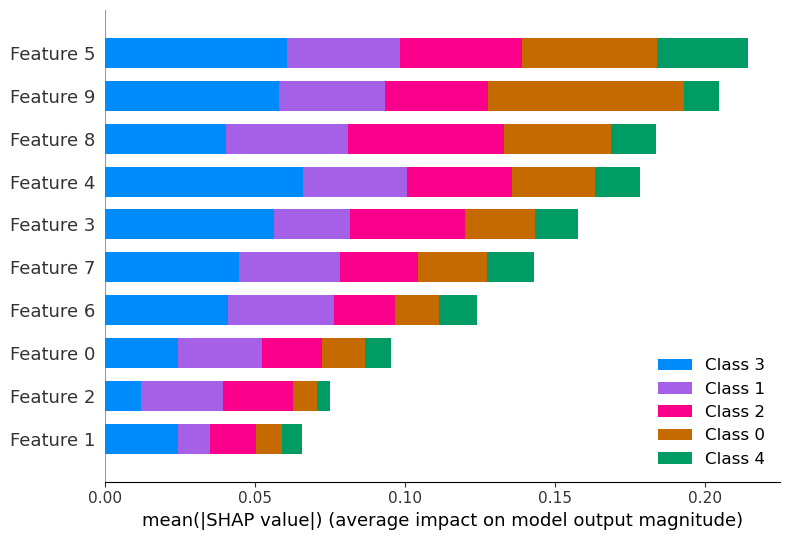

In [40]:
shap.summary_plot(shap_values, X_t)

In [50]:
explainer.expected_value

array([0.15941964, 0.20973214, 0.23267857, 0.34017857, 0.05799107])

In [69]:
y_t.value_counts().max() / y_t.count()

0.3392857142857143

In [58]:
shap_values[0].shape

(224, 10)

In [74]:
shap.initjs()

In [76]:
shap.plots.force(explainer.expected_value[3], shap_values[3])

In [80]:
shap.plots.force(explainer.expected_value[3], shap_values[3][3])

In [63]:
explainer.expected_value

array([0.15941964, 0.20973214, 0.23267857, 0.34017857, 0.05799107])

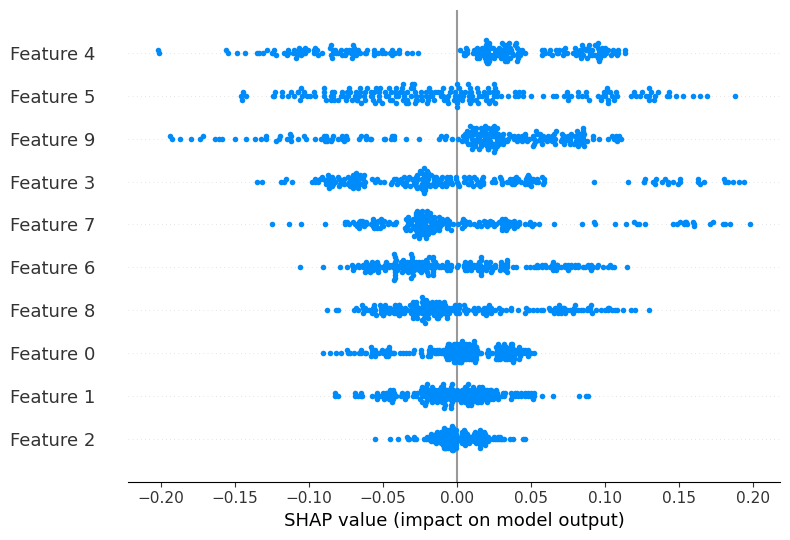

In [84]:
shap.plots._beeswarm.summary_legacy(shap_values[3])

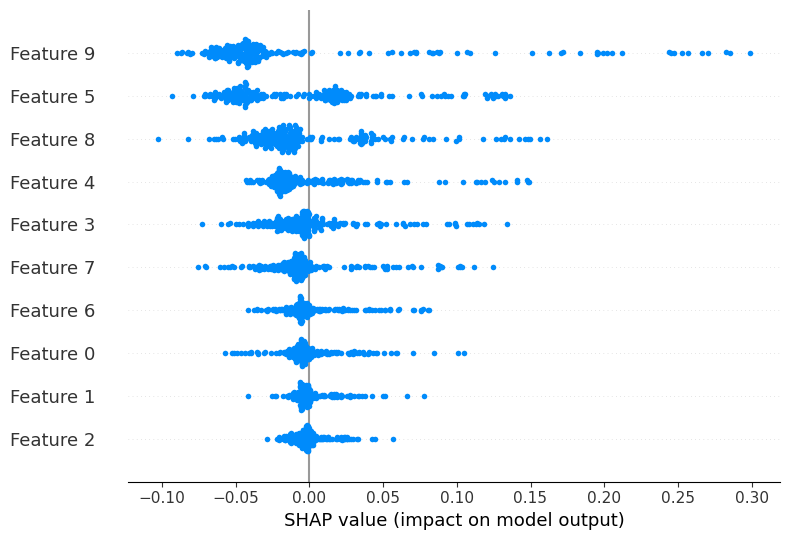

In [83]:
shap.plots._beeswarm.summary_legacy(shap_values[0])

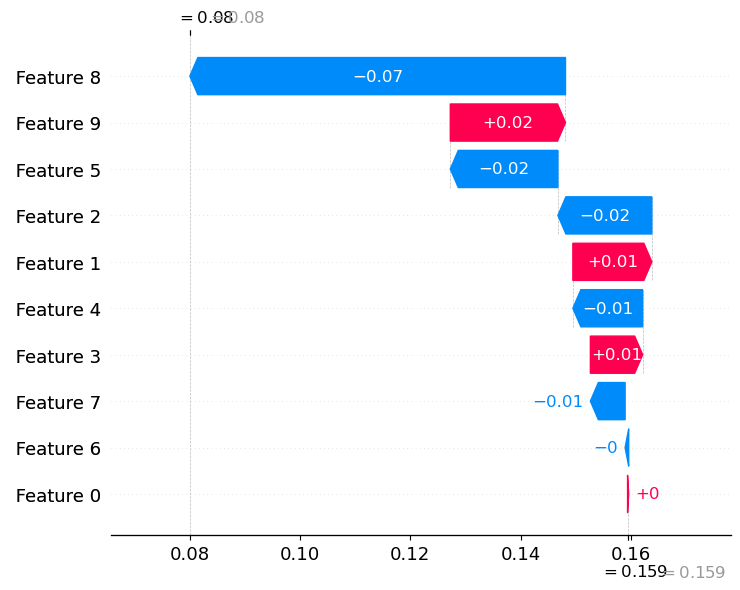

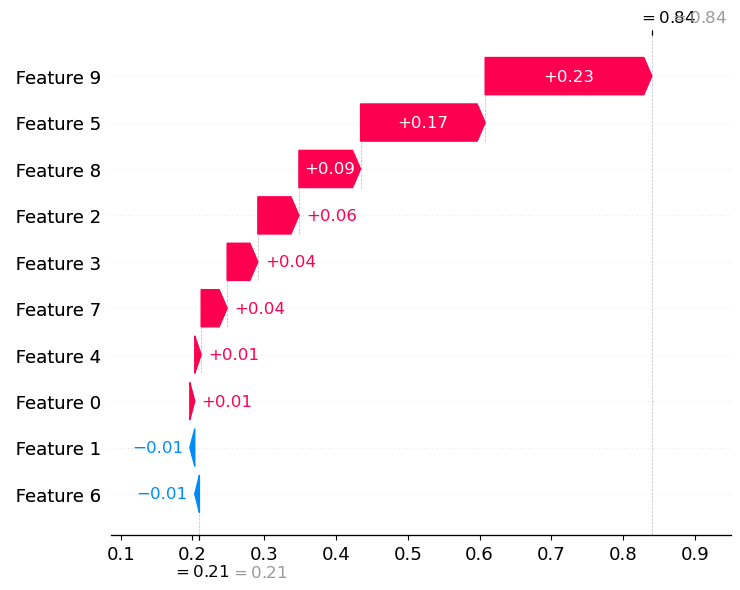

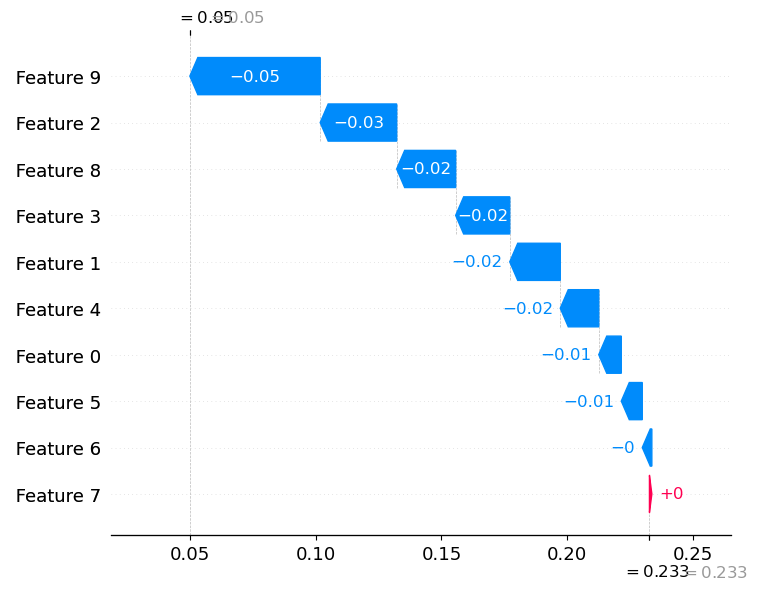

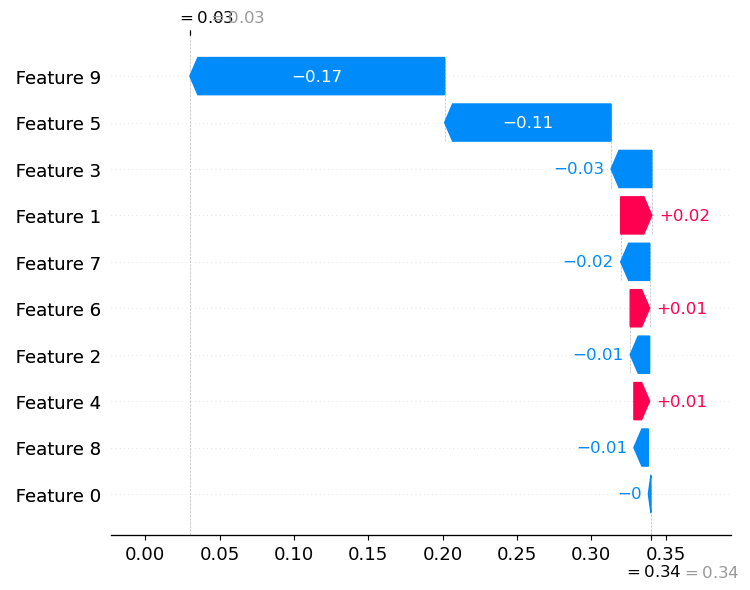

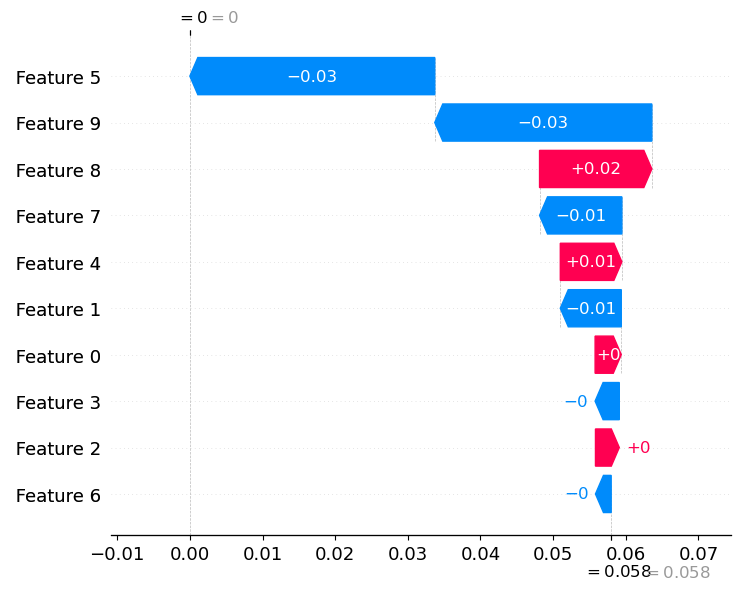

In [62]:
from shap.plots._waterfall import waterfall_legacy
shap_values = explainer.shap_values(X_t)
cls_idx = 0
for cls_idx in range(0,5):
    waterfall_legacy(explainer.expected_value[cls_idx], shap_values[cls_idx][0], X_t[0,:])

In [36]:
for l in shap_values:
    print(type(l))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [5]:
X_train.sort_index()

fun_HM  fun_Assortativity  fun_Hierarchy  fun_NE_G  \
Subject Site Time                                                         
1       1    1     0.064900          22.724355      -5.584579  0.749077   
        2    0     0.037389           7.278813       6.504268  0.744667   
2       2    0     0.072894          18.750108       3.284036  0.729131   
3       1    1     0.156290           7.027786       9.522723  0.744674   
        2    0     0.054797          15.904290       1.615296  0.735352   
...                     ...                ...            ...       ...   
198     1    1     0.175430           4.171140      11.869299  0.723478   
199     1    0     0.046410          17.581924      -0.070787  0.737363   
             1     0.051273          15.655031       0.792456  0.738347   
201     1    0     0.041366          27.016791      -3.043693  0.728993   
             1     0.041083          17.489144      -0.918440  0.742749   

                   fun_NE_L  fun_SW_CP  fun_SW_G  fun_SW_L  fun_SW_SPL  \
Subject Site Time                                                        
1       1    1     0.823988   0.648117  1.265259  0.999983    1.334365   
        2    0     0.824443   0.649066  1.311843  1.000097    1.344084   
2       2    0     0.815901   0.632708  1.352338  1.000122    1.372840   
3       1    1     0.884958   0.771105  1.570248  1.003459    1.342262   
        2    0     0.816361   0.633124  1.335039  1.000047    1.361157   
...                     ...        ...       ...       ...         ...   
198     1    1     0.807632   0.615634  1.338332  1.000210    1.381578   
199     1    0     0.822531   0.645268  1.296972  0.999985    1.355568   
             1     0.826172   0.652690  1.330697  1.000151    1.353771   
201     1    0     0.820529   0.642097  1.292528  1.000151    1.371125   
             1     0.819657   0.639542  1.298323  0.999987    1.345747   

                   fun_SW_S  ...  str_SE_68  str_SE_78   str_SE_1   str_SE_2  \
Subject Site Time            ...                                               
1       1    1     1.265272  ...  16.789385  37.412214  41.898200  16.971287   
        2    0     1.311604  ...  19.700173  41.910065  37.875753  18.002032   
2       2    0     1.351992  ...  16.588924  39.199546  38.386730  17.796762   
3       1    1     1.564680  ...  19.077292  26.329414  31.315377  21.786988   
        2    0     1.334827  ...  14.714978  36.816656  36.569728  15.205491   
...                     ...  ...        ...        ...        ...        ...   
198     1    1     1.338060  ...  13.084806  23.887024  31.289267  17.363978   
199     1    0     1.297002  ...  19.395737  31.245624  43.831189  18.872985   
             1     1.330507  ...  12.946939  31.634722  39.087316  20.111027   
201     1    0     1.292327  ...  14.113599  30.400059  33.904670  22.437266   
             1     1.298347  ...  16.389953  37.575653  36.319826  24.003556   

                   str_SE_3  str_SE_4   str_SE_5  str_SE_6   str_SE_7  \
Subject Site Time                                                       
1       1    1     3.267869  1.291780  20.537453  5.880738  31.264637   
        2    0     2.702300  3.089432  25.345685  6.219281  37.084254   
2       2    0     3.206303  1.728853  18.222041  7.248735  34.986423   
3       1    1     1.471212  1.356299  21.157520  6.489374  35.672991   
        2    0     3.079843  1.503744  24.384481  5.920337  28.084020   
...                     ...       ...        ...       ...        ...   
198     1    1     2.281714  1.994556  14.932606  2.998768  29.552357   
199     1    0     3.718723  1.258209  20.423407  7.847501  38.950972   
             1     5.968119  2.252402  22.873750  7.294566  37.435909   
201     1    0     1.263113  1.712396  19.432559  6.912292  32.779386   
             1     3.182143  1.734833  21.930172  4.754198  36.034794   

                    str_SE_8  
Subject Site Time             
1       1    1      8.344185 

In [24]:
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFECV
from sklearn.pipeline import Pipeline
from sklearn.base import clone

df = get_dataset(dataset_type="longitudinal", drop_na=True)

X, y = df.drop(columns="Group"), df["Group"]
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.2)
rf = RandomForestClassifier(random_state=42)
rfecv =RFECV(estimator=clone(rf),
                n_jobs=-1,
                step=0.1,
                verbose=10,
                min_features_to_select=10,)
pipe = Pipeline(steps=[("rfecv", rfecv), ("rf", rf)])
pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)
acc = accuracy_score(y_pred, y_test)
acc

    # df_train, df_test = get_train_test_split(df, test_split=0.2)
    # X_train, X_test, y_train, y_test = get_X_y_split(df_train, df_test)
    # svc = LinearSVC()
    # svc.fit(X_train,y_train)
    # y_pred = svc.predict(X_test)
    # acc = accuracy_score(y_test, y_pred)
    # print(acc)

/home/mike/miniconda3/envs/procan/lib/python3.10/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


Fitting estimator with 2704 features.
Fitting estimator with 2704 features.
Fitting estimator with 2704 features.
Fitting estimator with 2704 features.
Fitting estimator with 2704 features.
Fitting estimator with 2434 features.
Fitting estimator with 2434 features.
Fitting estimator with 2434 features.
Fitting estimator with 2434 features.Fitting estimator with 2434 features.

Fitting estimator with 2164 features.
Fitting estimator with 2164 features.
Fitting estimator with 2164 features.
Fitting estimator with 1894 features.
Fitting estimator with 1894 features.
Fitting estimator with 1894 features.
Fitting estimator with 2164 features.
Fitting estimator with 2164 features.
Fitting estimator with 1624 features.
Fitting estimator with 1624 features.
Fitting estimator with 1624 features.
Fitting estimator with 1894 features.
Fitting estimator with 1894 features.
Fitting estimator with 1354 features.
Fitting estimator with 1354 features.
Fitting estimator with 1354 features.
Fitting esti

0.75

In [22]:
X_train.columns[rfecv.get_support()]

Index(['fun_Dc_V14_0', 'fun_Nsp_V14_0', 'str_Nsp_V16_0', 'str_Bc_V63_0',
       'str_Bc_V88_0', 'str_Bc_V17_1', 'str_Bc_V40_1', 'str_Bc_V79_1',
       'str_Bc_V80_1', 'str_Bc_V87_1'],
      dtype='object')

In [34]:
from sklearn.model_selection import LeaveOneOut

loo = LeaveOneOut()

X,y = df.drop(columns=["Group"]), df["Group"]

for train_idx, test_idx in loo.split(X=X,y=y):
    print(test_idx)
    break

sub, site, time = X.iloc[test_idx].index[0]

X.loc[(sub, site)]


[0]


/tmp/ipykernel_22648/3379789627.py:13: PerformanceWarning: indexing past lexsort depth may impact performance.
  X.loc[(sub, site)]


,fun_HM,fun_Assortativity,fun_Hierarchy,fun_NE_G,fun_NE_L,fun_SW_CP,fun_SW_G,fun_SW_L,fun_SW_SPL,fun_SW_S,...,str_SE_68,str_SE_78,str_SE_1,str_SE_2,str_SE_3,str_SE_4,str_SE_5,str_SE_6,str_SE_7,str_SE_8
Time,,,,,,,,,,,,,,,,,,,,,
0,0.045966,16.817162,1.901156,0.749453,0.863211,0.727329,1.443734,0.999983,1.333692,1.443838,...,13.319021,32.523234,34.116990,17.834317,3.336126,1.712779,27.226736,7.314984,38.186613,12.50237
1,0.032404,12.932084,0.356535,0.744804,0.858619,0.717810,1.463236,1.000582,1.342028,1.462419,...,12.312617,33.028442,34.967631,18.992382,3.541999,1.216056,20.172694,6.515922,30.531727,7.74815


In [32]:
sub, site, time = idx[0]
sub

4

In [25]:
X.loc[(4,1)]

/tmp/ipykernel_22648/4131578954.py:1: PerformanceWarning: indexing past lexsort depth may impact performance.
  X.loc[(4,1)]


,fun_HM,fun_Assortativity,fun_Hierarchy,fun_NE_G,fun_NE_L,fun_SW_CP,fun_SW_G,fun_SW_L,fun_SW_SPL,fun_SW_S,...,str_SE_68,str_SE_78,str_SE_1,str_SE_2,str_SE_3,str_SE_4,str_SE_5,str_SE_6,str_SE_7,str_SE_8
Time,,,,,,,,,,,,,,,,,,,,,
0,0.045966,16.817162,1.901156,0.749453,0.863211,0.727329,1.443734,0.999983,1.333692,1.443838,...,13.319021,32.523234,34.116990,17.834317,3.336126,1.712779,27.226736,7.314984,38.186613,12.50237
1,0.032404,12.932084,0.356535,0.744804,0.858619,0.717810,1.463236,1.000582,1.342028,1.462419,...,12.312617,33.028442,34.967631,18.992382,3.541999,1.216056,20.172694,6.515922,30.531727,7.74815


In [46]:
def remove_unlabelled_subjects():
    nan_groups = df.loc[df["Group"].isna()].index
    unlabelled_subjects = []
    for idx in nan_groups:
        if len(df.loc[idx])<2:
            unlabelled_subjects.append(idx)
        else:a
            group_label = df.loc[idx].loc[~df.loc[idx]["Group"].isna()]['Group'].item()
            df.loc[idx]["Group"].fillna(group_label, inplace=True)

    return df


C:\Users\Mike\AppData\Local\Temp\ipykernel_9152\2237700037.py:4: PerformanceWarning: indexing past lexsort depth may impact performance.
  if len(df.loc[idx])<2:


,,fun_HM,Time,fun_Assortativity,fun_Hierarchy,fun_NE_G,fun_NE_L,fun_SW_CP,fun_SW_G,fun_SW_L,fun_SW_SPL,...,str_Pc_V81,str_Pc_V82,str_Pc_V83,str_Pc_V84,str_Pc_V85,str_Pc_V86,str_Pc_V87,str_Pc_V88,str_Pc_V89,str_Pc_V90
Subject,Site,,,,,,,,,,,,,,,,,,,,,
4,1,0.045966,0,16.817162,1.901156,0.749453,0.863211,0.727329,1.443734,0.999983,1.333692,...,0.984259,0.951671,0.961734,0.961692,0.984223,0.939442,0.962159,0.950848,0.948889,0.958395
5,1,0.047396,0,12.918883,-0.958542,0.730270,0.817125,0.634829,1.331257,1.000037,1.368716,...,0.974521,0.950295,0.979595,0.960123,0.994422,0.950558,0.972070,0.938776,0.980373,0.899311
7,1,0.078991,0,15.880828,-0.870523,0.745417,0.820951,0.642204,1.270436,1.000145,1.340914,...,0.973969,0.854759,0.975448,0.953629,0.982435,0.966500,0.963134,0.937093,0.976263,0.958587
8,1,0.077669,0,7.466142,5.164816,0.744779,0.830143,0.660522,1.336837,1.000038,1.342067,...,0.990925,0.996452,0.976940,0.956110,0.962883,0.972740,0.908804,0.951663,0.942004,0.972810
9,1,0.082430,0,17.241499,1.215548,0.739419,0.842279,0.685111,1.393930,1.001184,1.351790,...,0.963465,0.977714,0.957392,0.953775,0.972655,0.975299,0.916182,0.907414,0.957212,0.911218
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13,2,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.965869,0.970500,0.975098,0.986230,0.984433,0.982425,0.947925,0.949643,0.962495,0.967030
20,2,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.965792,0.932020,0.964875,0.960265,0.956273,0.958333,0.920233,0.936833,0.894242,0.935363
58,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.954976,0.953377,0.986779,0.959024,0.994069,0.938341,0.984359,0.890768,0.977002,0.947713


In [34]:
group_label = [d for d in df.loc[idx]["Group"].values if d != np.float("NaN")]
group_label

C:\Users\Mike\AppData\Local\Temp\ipykernel_9152\1663327659.py:1: PerformanceWarning: indexing past lexsort depth may impact performance.
  group_label = [d for d in df.loc[idx]["Group"].values if d != np.float("NaN")]


AttributeError: module 'numpy' has no attribute 'float'.
`np.float` was a deprecated alias for the builtin `float`. To avoid this error in existing code, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
The aliases was originally deprecated in NumPy 1.20; for more details and guidance see the original release note at:
    https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

In [242]:
def get_combat_dataset(config, index_col, drop_nan):
    col_mapping = {
        "data_combat.Subject": "Subject",
        "data_combat.Time": "Time",
        "data_combat.Site": "Site"
    }
    fun_df = get_data_by_parent_dir(config.T12_DATA_PATH / "fMRI", "fun", index_col, col_mapping)
    struct_df = get_data_by_parent_dir(config.T12_DATA_PATH / "DTI", "str", index_col, col_mapping)
    update_cols = ["Age", "Group"]
    update_series = {k:fun_df[k] for k in update_cols}
    fun_df = fun_df.drop(columns=update_cols)
    df = pd.merge(left=fun_df, right=struct_df, on=("Subject", "Site", "Time"), how="outer")
    for k,v in update_series.items():
        df[k].update(v)
    df = df.set_index(["Subject", "Site",])
    if drop_nan:
        df = df.drop(get_nan_index(df), axis=0)
    return df

def get_data_by_parent_dir(root_path, col_prefix, index_col, col_mapping):
    label_cols = ("Subject", "Time", "Site", "Age", 'Group')
    dfs = root_path.glob("**/*.csv")
    dfs = list(map(partial(load_and_rename_index, index_col=index_col, col_mapping=col_mapping), dfs))
    df = reduce(lambda left, right: pd.merge(left, right, how="outer", on=("Subject", "Site", "Time")), dfs)
    df = drop_unwanted_columns(df)
    df = rename_combat_cols(df)
    col_name_map = {col: f"{col_prefix}_{col}" for col in df.columns if col not in label_cols}
    df = df.rename(col_name_map, axis=1)
    return df

def load_and_rename_index(df_path, index_col, col_mapping):
    df = pd.read_csv(df_path)
    for k,v in col_mapping.items():
        if k in df:
            df[v] = df[k]
            df = df.drop(columns=[k])
    if "Unnamed: 0" in df:
        df = df.drop(columns=["Unnamed: 0"])
    print(f"{df_path.name}: {df.shape}")
    return df

def drop_unwanted_columns(df):
    df = df.drop(columns=df.filter(like="delta2hat").columns)
    df = df.drop(columns=df.filter(like="gammahat").columns)
    df = df.drop(columns=df.filter(like="gammastarhat").columns)
    df = df.drop(columns=df.filter(like="delta2starhat").columns)
    return df

def rename_combat_cols(df):
    name_map = {}
    for col in df.columns:
        if "combat" in col:
            new_name = col.split(".")[1]
            name_map[col]= new_name
    print(name_map)
    df = df.rename(name_map, axis=1)
    return df

def get_nan_index(df):
    return df.loc[df.isna().T.any()].index.to_list()

df = get_combat_dataset(config, index_col=["Subject", "Site",], drop_nan=False)


fMRI_ID_CV_HM.csv: (292, 6)
Harmzd_fMRI_global.csv: (292, 48)
Harmzd_fMRI_MI.csv: (292, 183)
Harmzd_fMRI_Bc.csv: (292, 453)
Harmzd_fMRI_Dc.csv: (292, 453)
Harmzd_fMRI_Ncc.csv: (292, 453)
Harmzd_fMRI_Ne.csv: (292, 453)
Harmzd_fMRI_Nle.csv: (292, 453)
Harmzd_fMRI_Nsp.csv: (292, 453)
Harmzd_fMRI_Pc.csv: (292, 453)
{'data_combat.Assortativity.combat': 'Assortativity', 'data_combat.Hierarchy.combat': 'Hierarchy', 'data_combat.NE_G.combat': 'NE_G', 'data_combat.NE_L.combat': 'NE_L', 'data_combat.SW_CP.combat': 'SW_CP', 'data_combat.SW_G.combat': 'SW_G', 'data_combat.SW_L.combat': 'SW_L', 'data_combat.SW_SPL.combat': 'SW_SPL', 'data_combat.SW_S.combat': 'SW_S', 'data_combat.SE_12.combat': 'SE_12', 'data_combat.SE_13.combat': 'SE_13', 'data_combat.SE_14.combat': 'SE_14', 'data_combat.SE_15.combat': 'SE_15', 'data_combat.SE_16.combat': 'SE_16', 'data_combat.SE_17.combat': 'SE_17', 'data_combat.SE_18.combat': 'SE_18', 'data_combat.SE_23.combat': 'SE_23', 'data_combat.SE_24.combat': 'SE_24', 'dat

In [243]:
def get_delta_features_df(df):
    df = df.copy()
    df = get_df_with_only_2_visits(df)
    non_delta_cols = [
        "Group",
        "fun_HM",
        "Age",
        "Time"
    ]
    t0, t1 = get_t0_t1(df)
    non_delta_features = get_non_delta_features(t0,t1)
    df = t1.drop(columns=non_delta_cols) - t0.drop(columns=non_delta_cols)
    df = df.merge(non_delta_features, left_index=True, right_index=True)
    return df

def get_non_delta_features(t0, t1):
    non_delta_cols = [
        "Group",
        "fun_HM",
        "Age",
    ]
    non_delta_features = t0[non_delta_cols]
    non_delta_features = non_delta_features.merge(t1["fun_HM"].rename("fun_HM_1"), right_index=True, left_index=True)
    non_delta_features = non_delta_features.merge(t1["Age"].rename("Age_1"), right_index=True, left_index=True)
    return non_delta_features
    
def get_df_with_only_2_visits(df):
    return df.loc[(df.reset_index().groupby(["Subject", "Site"]).count()["Time"] >= 2)]

def get_t0_t1(df):
    t0 = df.loc[df["Time"]==0]
    t1 = df.loc[df["Time"]==1]
    return t0, t1

def get_longitudinal_datasets(df):
    df = df.copy()
    t0, t1 = get_t0_t1(df)
    t0 = t0.drop(columns=["Time"])
    t1 = t1.drop(columns=["Time", 'Group']) # We use group label at t0
    df = t0.merge(t1, left_index=True, right_index=True, suffixes=("_0", "_1"))
    return df

def get_train_test_split(df, test_split = None, test_idx = None):
    if test_idx is None and test_split is None:
        raise ValueError(f"Must pass test split or test idx!")
    unique_subjects = df.index.unique()
    if test_split is not None:
        test = np.random.permutation(math.ceil(test_split * len(unique_subjects)))
        train = [idx for idx in range(len(unique_subjects)) if idx not in test]
        test_idx = unique_subjects[test]
        train_idx = unique_subjects[train]
    else:  # test_idx not none
        if not isinstance(test_idx, list):
            test_idx = [test_idx]
        test_idx = df.iloc[test_idx].index
        train_idx = [idx for idx in df.index if idx not in test_idx]
    return df.loc[train_idx], df.loc[test_idx]

def get_longitudinal_datasets(df):
    df = df.copy()
    t0, t1 = get_t0_t1(df)
    t0 = t0.drop(columns=["Time"])
    t1 = t1.drop(columns=["Time", 'Group']) # We use group label at t0
    df = t0.merge(t1, left_index=True, right_index=True, suffixes=("_0", "_1"))
    return df

In [244]:
delta_df = get_delta_features_df(df)
long_df = get_longitudinal_datasets(df)
cross_sec_df = df

dfs = [delta_df, long_df, cross_sec_df]

In [245]:
def get_X_y_split(df_train, df_test):
    y_train, y_test = df_train["Group"], df_test["Group"]
    X_train, X_test = df_train.drop(columns=["Group"]), df_test.drop(columns=["Group"])
    return X_train, X_test, y_train, y_test



In [246]:
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

for df in dfs:
    df_train, df_test = get_train_test_split(df, test_split=0.2)
    X_train, X_test, y_train, y_test = get_X_y_split(df_train, df_test)
    svc = LinearSVC()
    svc.fit(X_train,y_train)
    y_pred = svc.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(acc)

ValueError: Input X contains NaN.
LinearSVC does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [247]:
import xgboost

ModuleNotFoundError: No module named 'xgboost'